In [1]:
from collections import deque
import time
import math

In [2]:
maze = [
['S', 'W', 'W', 'W', ' ', ' ', ' ', ' ', 'W', ' ', ' ', 'W', ' ', ' ', ' ', 'E'],
[' ', ' ', ' ', 'W', 'W', 'W', 'W', ' ', 'W', 'W', 'W', ' ', 'W', ' ', 'W', ' '],
[' ', ' ', 'W', ' ', ' ', ' ', 'W', ' ', 'W', ' ', ' ', ' ', 'W', ' ', ' ', ' '],
[' ', 'W', ' ', ' ', 'W', ' ', 'W', ' ', ' ', ' ', 'W', ' ', 'W', 'W', 'W', ' '],
[' ', 'W', 'W', ' ', 'W', ' ', 'W', 'W', 'W', ' ', 'W', ' ', 'W', ' ', ' ', ' '],
[' ', ' ', 'W', ' ', 'W', ' ', ' ', ' ', ' ', ' ', 'W', ' ', ' ', ' ', 'W', ' '],
[' ', 'W', 'W', ' ', 'W', ' ', 'W', ' ', 'W', ' ', 'W', ' ', 'W', ' ', ' ', ' '],
[' ', ' ', ' ', ' ', 'W', ' ', 'W', ' ', ' ', ' ', ' ', ' ', 'W', ' ', 'W', ' '],
['W', 'W', 'W', 'W', 'W', ' ', 'W', ' ', 'W', 'W', 'W', 'W', 'W', ' ', 'W', ' '],
[' ', ' ', ' ', ' ', ' ', ' ', 'W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W', ' '],
['W', 'W', 'W', 'W', 'W', ' ', 'W', ' ', 'W', ' ', 'W', 'W', 'W', ' ', 'W', ' '],
[' ', ' ', ' ', ' ', 'W', ' ', ' ', ' ', 'W', ' ', ' ', ' ', ' ', ' ', 'W', ' '],
[' ', 'W', 'W', ' ', 'W', ' ', 'W', ' ', 'W', ' ', 'W', ' ', 'W', 'W', 'W', ' '],
[' ', 'W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W', ' ', ' ', ' ', ' ', ' '],
[' ', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', ' ', 'W', 'W', 'W', ' ', 'W', ' '],
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
]

In [3]:
def print_maze(maze):
    for row in maze:
        print(' '.join(row))

In [4]:
print_maze(maze)

S W W W         W     W       E
      W W W W   W W W   W   W  
    W       W   W       W      
  W     W   W       W   W W W  
  W W   W   W W W   W   W      
    W   W           W       W  
  W W   W   W   W   W   W      
        W   W           W   W  
W W W W W   W   W W W W W   W  
            W               W  
W W W W W   W   W   W W W   W  
        W       W           W  
  W W   W   W   W   W   W W W  
  W                 W          
  W W W W W W W W   W W W   W  
                               
W W W W W W W W W W W W W W W W


In [5]:
def bfs(maze, start, end):
    queue = deque([(start, [])])
    size2=0
    visited = set()
    while queue:
        current , path = queue.popleft()
        x, y = current

        if current == end:
            return path + [current] , size2

        if 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != 'W' and current not in visited:
            visited.add(current)
            for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                if 0 <= x+dx < len(maze) and 0 <= y+dy < len(maze[0]) and maze[x+dx][y+dy] != 'W':
                    queue.append(((x+dx, y+dy), path + [current]))
        size2=max(size2,len(queue))


In [6]:
start_time = time.time()

start = (0,0)
end = (0,15)
bfs_path , size2 = bfs(maze, start, end)
print(len(bfs_path)-1)
print(bfs_path)
maze1 = maze
for x,y in bfs_path:
    maze1[x][y] = '-'

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken to run the program using BFS: {elapsed_time} seconds")

39
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6), (5, 7), (6, 7), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (6, 11), (5, 11), (5, 12), (5, 13), (4, 13), (4, 14), (4, 15), (3, 15), (2, 15), (1, 15), (0, 15)]
Time taken to run the program using BFS: 0.0011281967163085938 seconds


In [7]:
print_maze(maze1)

- W W W         W     W       -
-     W W W W   W W W   W   W -
-   W - - - W   W       W     -
- W   - W - W       W   W W W -
- W W - W - W W W   W   W - - -
-   W - W - - -     W - - - W  
- W W - W   W - W   W - W      
- - - - W   W - - - - - W   W  
W W W W W   W   W W W W W   W  
            W               W  
W W W W W   W   W   W W W   W  
        W       W           W  
  W W   W   W   W   W   W W W  
  W                 W          
  W W W W W W W W   W W W   W  
                               
W W W W W W W W W W W W W W W W


In [8]:
def dfs(maze, start, end):
    stack = [(start, [])]
    shortest_path = []
    ls =[]
    size1=0
    while stack:
        current, path = stack.pop()
        ls.append(current)
        x, y = current

        if current == end:
           # print(path + [current])
            if not shortest_path or len(path) < len(shortest_path):
                shortest_path = path + [current]
            continue

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_pos = (x + dx, y + dy)
            if 0 <= new_pos[0] < len(maze) and 0 <= new_pos[1] < len(maze[0]) and maze[new_pos[0]][new_pos[1]] != 'W' and new_pos not in path :
                stack.append((new_pos, path + [current]))
            size1=max(size1,len(stack))
    print(len(ls))
    return shortest_path , size1

In [9]:
start_time1 = time.time()

dfs_path , size1 = dfs(maze, start, end)
print(len(dfs_path)-1)
print(dfs_path)
maze2 = maze

end_time1 = time.time()
elapsed_time1 = end_time1 - start_time1

print(f"Time taken to run the program using DFS: {elapsed_time1} seconds")
print(f"Ratio of times using DFS & BFS: { elapsed_time1/elapsed_time }")
print("Ratio of space using DFS & BFS: ", size1/size2)

336590
39
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6), (5, 7), (6, 7), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (6, 11), (5, 11), (5, 12), (5, 13), (4, 13), (4, 14), (4, 15), (3, 15), (2, 15), (1, 15), (0, 15)]
Time taken to run the program using DFS: 2.565222978591919 seconds
Ratio of times using DFS & BFS: 2273.7373203719358
Ratio of space using DFS & BFS:  1.0952380952380953


In [10]:
for x,y in dfs_path:
    maze2[x][y] = '-'
print_maze(maze2)

- W W W         W     W       -
-     W W W W   W W W   W   W -
-   W - - - W   W       W     -
- W   - W - W       W   W W W -
- W W - W - W W W   W   W - - -
-   W - W - - -     W - - - W  
- W W - W   W - W   W - W      
- - - - W   W - - - - - W   W  
W W W W W   W   W W W W W   W  
            W               W  
W W W W W   W   W   W W W   W  
        W       W           W  
  W W   W   W   W   W   W W W  
  W                 W          
  W W W W W W W W   W W W   W  
                               
W W W W W W W W W W W W W W W W


In [11]:
import matplotlib.pyplot as plt
def visualize_maze(maze, path):
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == 'W':
                plt.plot(j, i, 'g*', markersize=10)
            elif (i, j) in path:
                plt.plot(j, i, 'ro', markersize=10)
            else:
                plt.plot(j, i, 'wo', markersize=10)

    plt.plot(path[-1][1], -path[-1][0], 'bs', markersize=10)
    plt.plot(path[0][1], -path[0][0], 'bo', markersize=10)

    plt.gca().invert_yaxis()
    plt.show()

visualize_maze(maze, dfs_path)
visualize_maze(maze, bfs_path)

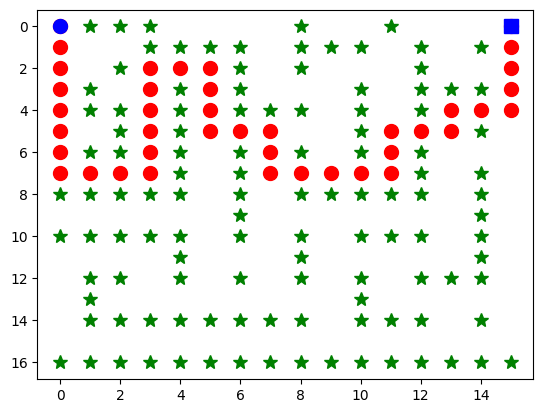

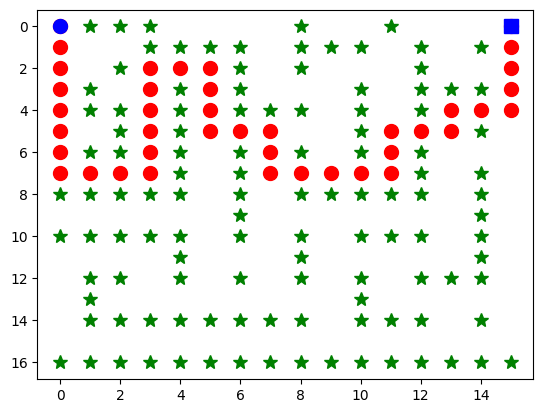

In [12]:
visualize_maze(maze, dfs_path)
visualize_maze(maze, bfs_path)